<a href="https://colab.research.google.com/github/bokuwakira1411/Data-mining---ex2-3/blob/main/exercise_2%2B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Xử lý dữ liệu training set

In [2]:

df_train = pd.read_csv("/content/labeled_train.csv")
df_train.head()

,Date,Time,Open,High,Low,Close,Volume,Label
0,2011-01-03,01:00,1415.71,1416.54,1415.10,1415.63,1035,SELL
1,2011-01-03,02:00,1415.64,1416.43,1414.90,1415.98,736,SELL
2,2011-01-03,03:00,1415.95,1417.89,1414.59,1416.54,922,SELL
3,2011-01-03,04:00,1416.51,1418.64,1415.25,1416.75,1060,SELL
4,2011-01-03,05:00,1416.76,1420.00,1416.76,1419.48,838,SELL


In [3]:
df_train.isnull().sum()

,0
Date,0
Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


# Line plot

In [4]:
df_train.dtypes

,0
Date,object
Time,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,object


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

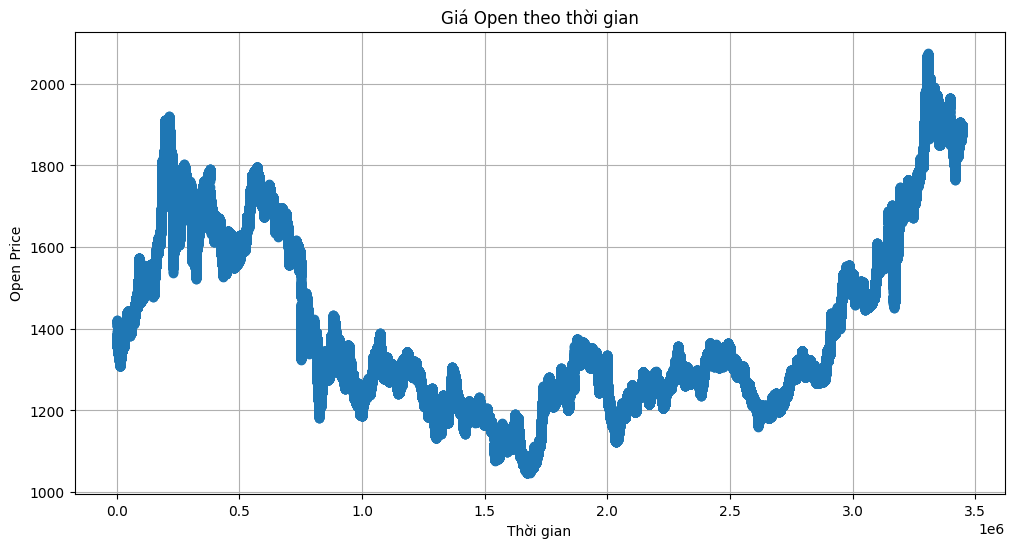

In [6]:
df_train['Open'].plot(title='Giá Open theo thời gian', marker='o',figsize=(12, 6))
plt.xlabel('Thời gian')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()


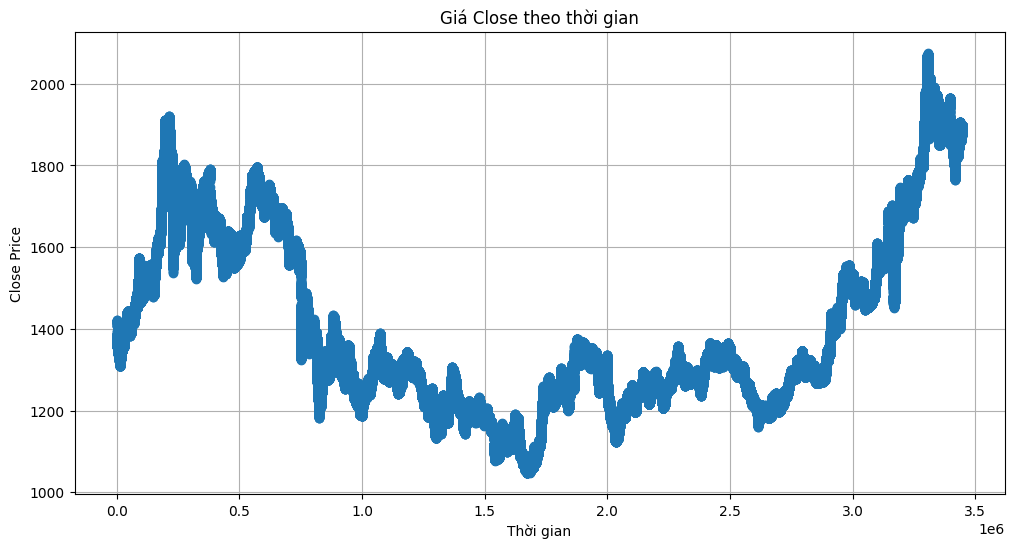

In [7]:
df_train['Close'].plot(title='Giá Close theo thời gian', marker='o',figsize=(12, 6))
plt.xlabel('Thời gian')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


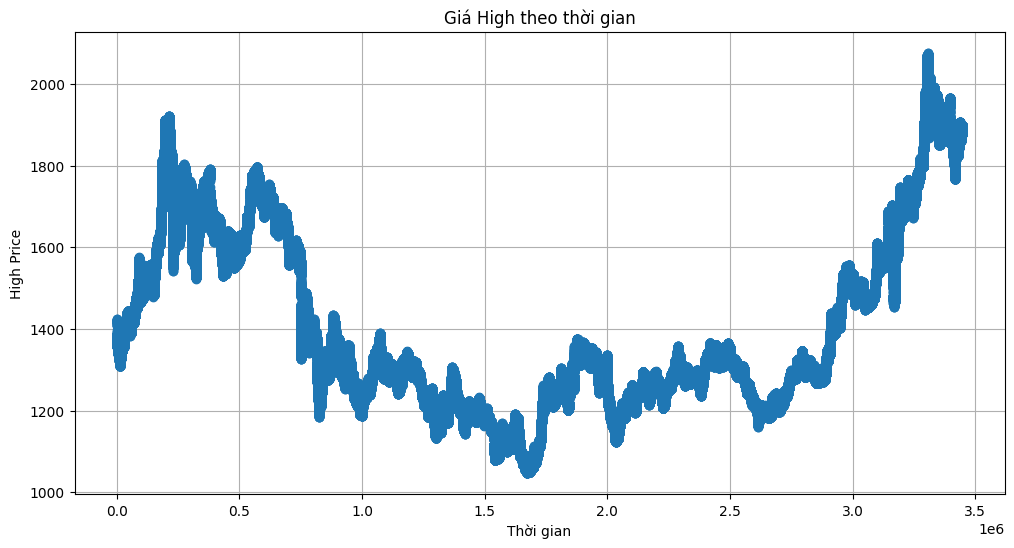

In [8]:
df_train['High'].plot(title='Giá High theo thời gian', marker='o',figsize=(12, 6))
plt.xlabel('Thời gian')
plt.ylabel('High Price')
plt.grid(True)
plt.show()


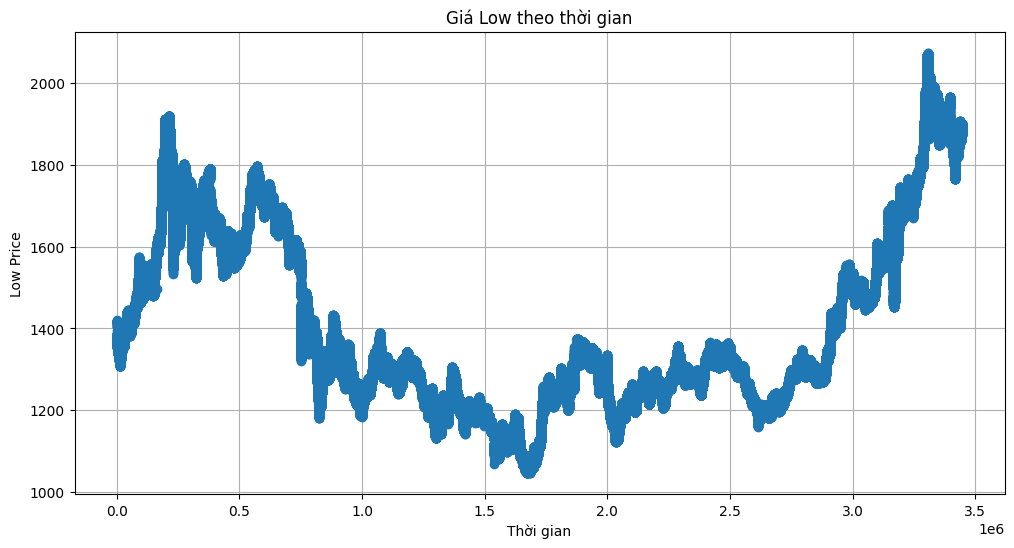

In [9]:
df_train['Low'].plot(title='Giá Low theo thời gian', marker='o',figsize=(12, 6))
plt.xlabel('Thời gian')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()


## Xử lý dữ liệu development set

In [10]:
df_dev = pd.read_csv("/content/labeled_dev.csv")
df_dev.head()

,Date,Time,Open,High,Low,Close,Volume,Label
0,2021-01-04,00:05,1909.07,1909.33,1907.95,1908.40,236,BUY
1,2021-01-04,00:06,1908.36,1909.18,1907.82,1908.68,193,BUY
2,2021-01-04,00:07,1908.67,1908.80,1908.18,1908.27,113,BUY
3,2021-01-04,00:08,1908.27,1908.51,1907.84,1908.15,103,BUY
4,2021-01-04,00:09,1908.19,1908.88,1907.73,1908.77,165,BUY


In [11]:
df_dev.isnull().sum()

,0
Date,0
Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


In [12]:
df_dev.shape

(350984, 8)

### Sample dữ liệu

### Tính toán các chỉ số kỹ thuật


In [13]:
df_dev_with_indicators = calculate_all_technical_indicators(df_dev_resampled)
df_dev_with_indicators.dropna(inplace=True)
df_dev_with_indicators.head()

NameError: name 'calculate_all_technical_indicators' is not defined

### Chuẩn hoá Z-score

In [ ]:
from sklearn.preprocessing import StandardScaler

feature_cols = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'MACD', 'MACD_Signal', 'MACD_Hist',
    'RSI', 'BB_upper', 'BB_lower', 'BB_width',
    'Tenkan_sen', 'Kijun_sen', 'Senkou_A', 'Senkou_B',
    'Chikou_span', 'ATR'
]
scaler = StandardScaler()

# Fit và transform
df_dev_with_indicators[feature_cols] = scaler.fit_transform(df_dev_with_indicators[feature_cols])
df_dev_with_indicators.tail()

# MÔ HÌNH

In [ ]:
df_train.shape

In [ ]:
df = df_train

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.sort_values('Datetime').reset_index(drop=True)
df['TimeDelta'] = df['Datetime'].diff().dt.total_seconds().div(60).fillna(0)


In [ ]:
df_dev['Datetime'] = pd.to_datetime(df_dev['Date'] + ' ' + df_dev['Time'])
df_dev = df_dev.sort_values('Datetime').reset_index(drop=True)
df_dev['TimeDelta'] = df_dev['Datetime'].diff().dt.total_seconds().div(60).fillna(0)


In [ ]:
df_dev

In [ ]:
df['Label'].unique()

In [ ]:
df_dev['Label'].unique()

In [ ]:
labels = df['Label'].shift(-1)

In [ ]:
labels.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = df['Label']
labels = labels.reset_index(drop=True)


In [ ]:
print(labels.isna().sum())

In [ ]:
print(labels.unique())

In [ ]:
le = LabelEncoder()
y = le.fit_transform(labels)
print(le.classes_)

In [ ]:
labels = df_dev['Label']
labels = labels.reset_index(drop=True)


In [ ]:
labels.unique()

In [ ]:
y_valid = le.fit_transform(labels)
y_valid

In [ ]:
labels

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'TimeDelta']
X = df[features].copy()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import numpy as np

def create_sequences(data, seq_length=60):
    X_seq = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        X_seq.append(seq)
    return np.array(X_seq)

X_seq = create_sequences(X_scaled, seq_length=60)


In [ ]:
def create_label_sequences(labels, seq_length=60):
    y_seq = []
    for i in range(len(labels) - seq_length):
        seq = labels[i + seq_length - 1]
        y_seq.append(seq)
    return np.array(y_seq)


In [ ]:
y_seq = create_label_sequences(y, seq_length=60)

In [ ]:
print(X_seq.shape, y_seq.shape)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch

X_tensor = torch.tensor(X_seq, dtype=torch.float32)
y_tensor = torch.tensor(y_seq, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

Thiết kế mô hình Transformers (ver 1)
- Transformer thông thường + Time2Vec
- Tầng Fully Connected sẽ thực hiện tác vụ phân lớp

Với 5 triệu dòng, ta nên chia nhỏ để train mô hình, để sử dụng time2vec thì ta cần 1 tầng linear có size k*2 (số giá trị w và phi)

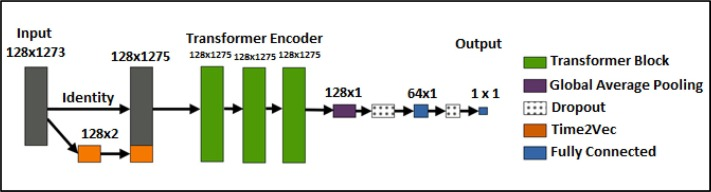

1. Input -> Time2Vec encoding + positional encoding

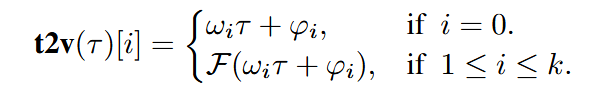

In [ ]:
import torch
import torch.nn as nn
import math
import torch.nn.functional as F

In [ ]:
class Time2Vec(nn.Module):
  def __init__(self, seq_len, kernel_size):
    super(Time2Vec, self).__init__()
    self.linear = nn.Linear(1,1)      #i = 0
    self.seq_len = seq_len
    self.periodic = nn.Linear(1, kernel_size-1) # i = 1:k
  def forward(self, x):
    seq_len = x.size(1)
    t = torch.arange(seq_len).float().unsqueeze(1).to(x.device)
    lin = self.linear(t)
    sin = torch.sin(self.self.periodic(t)) # F: sin
    time_embedding = torch.cat([lin, sin], dim=1)  # (seq_len, out_features)
    time_embedding = time_embedding.unsqueeze(0).repeat(x.size(0), 1, 1)  # (batch_size, seq_len, out_features)
    return time_embedding

Các chỉ số đầu vào:
- số lượng đặc trưng: input_dim
- số chiều của time2vec: time2vec_dim
- số chiều của vector biểu diễn cho mỗi bước thời gian: d_model


In [ ]:
class Transformer(nn.Module):
  def __init__(self,seq_len, input_dim, time2vec_dim, d_model, nhead, num_layers, num_outputs):
    super(Transformer, self).__init__()
    self.time2vec = Time2Vec(seq_len,time2vec_dim)
    encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
    self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
    self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
    self.dropout = nn.Dropout(0.2)
    self.fc1 = nn.Linear(d_model, 32)
    self.fc2 = nn.Linear(32,1)
  def forward(self, x):
    t2v = self.time2vec(x) # (batch_size, seq_len, time2vec_dim)
    x = torch.cat([x, t2v], dim=-1) #(batch_size, seq_len, time2vec_dim + input_dim)
    x = self.encoder(x)
    x = x.transpose(1,2) #(batch_size, total_input_dim, seq_len)
    x = self.global_avg_pool(x).squeeze(-1)
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = torch.sigmoid(self.fc2(x))
    return x